Обзор транзакционных данных, которые были предложены участникам [соревнования от Альфа-Банка](https://boosters.pro/championship/alfabattle2_sand/overview) (см. раздел "Вторая задача").

## Что в датасете
- примерно 964К клиентов в train части / 502К в test
- примерно 270М транзакций в train части / 173M в test

test часть разделена с train частью по времени

### Описание доступных файлов
- *alfabattle2_train_transactions_contest* - тренировочная выборка с транзакционными данными (папка с 50 файлами в формате parquet)
- *alfabattle2_test_transactions_contest*  - тестовая выборка с транзакционными данными (папка с 50 файлами в формате parquet)
- *alfabattle2_test_target_contest.csv*  - выборка для построения прогноза
- *alfabattle2_train_target.csv*  - выборка для обучения

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

from utils import read_parquet_dataset_from_local

----
### Файл с таргетом

##### Описание колонок
- *app_id* - Идентификатор заявки. заявки пронумерованы так, что более поздним заявкам соответствует более поздняя дата
- *product* - Продукт по которому нужно принять решение, уйдет ли заявитель в дефолт или нет
- *flag* - Целевая переменная, 1 - факт ухода в дефолт. Доступна в обучающей выборке.

In [2]:
train_target = pd.read_csv("data/alfabattle2_sand_alfabattle2_train_target.csv")
train_target.head()

,app_id,product,flag
0,0,3,0
1,1,1,0
2,2,1,0
3,3,1,0
4,4,1,0


In [3]:
print("Число заявок (клиентов) в обучающей части датасета:")
len(train_target)

Число заявок (клиентов) в обучающей части датасета:


963811

In [4]:
print("Доля заявок, в которых случился дефолт:")
train_target["flag"].sum() / len(train_target)

Доля заявок, в которых случился дефолт:


0.027574908358588977

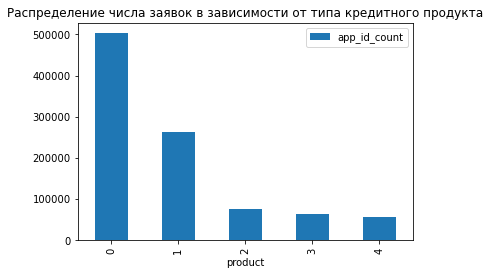

In [5]:
df = train_target.groupby("product").agg(["mean", "count"]).reset_index()
df.columns = ["product", "app_id_mean", "app_id_count", "flag_mean", "flag_count"]
df = df[["product", "app_id_count", "flag_mean"]]
df[["product", "app_id_count"]].plot.bar("product")
plt.title("Распределение числа заявок в зависимости от типа кредитного продукта")
plt.show()

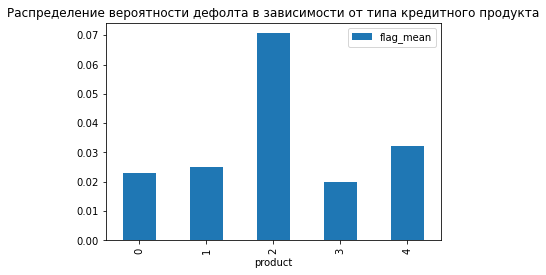

In [6]:
df[["product", "flag_mean"]].plot.bar("product")
plt.title("Распределение вероятности дефолта в зависимости от типа кредитного продукта")
plt.show()

In [7]:
test_target = pd.read_csv("data/alfabattle2_sand_alfabattle2_test_target_contest.csv")
test_target.head()

,app_id,product
0,1063620,0
1,1063621,0
2,1063622,1
3,1063623,1
4,1063624,2


In [8]:
print("Число заявок (клиентов) в тестовой части датасета:")
len(test_target)

Число заявок (клиентов) в тестовой части датасета:


502716

----
### Транзакционные данные

##### Описание колонок
- *app_id* - Идентификатор заявки. заявки пронумерованы так, что более поздним заявкам соответствует более поздняя дата
- *amnt* - Нормированная сумма транзакции. 0.0 - соответствует пропускам 
- *currency* - Идентификатор валюты транзакции
- *operation_kind* - Идентификатор типа транзакции
- *card_type* - Уникальный идентификатор типа карты
- *operation_type* - Идентификатор типа операции по пластиковой карте
- *operation_type_group* - Идентификатор группы карточных операций, например, дебетовая карта или кредитная карта
- *ecommerce_flag* - Признак электронной коммерции
- *payment_system* - Идентификатор типа платежной системы
- *income_flag* - Признак списания/внесения денежных средств на карту
- *mcc* - Уникальный идентификатор типа торговой точки
- *country* - Идентификатор страны транзакции
- *city* - Идентификатор города транзакции
- *mcc_category* - Идентификатор категории магазина транзакции
- *day_of_week* - День недели, когда транзакция была совершена
- *hour* - Час, когда транзакция была совершена
- *days_before* - Количество дней до даты выдачи кредита
- *weekofyear* - Номер недели в году, когда транзакция была совершена
- *hour_diff* - Количество часов с момента прошлой транзакции для данного клиента
- *transaction_number* - Порядковый номер транзакции клиента

Видно, что в описаниии транзакций достаточно много категориальных признаков.

In [9]:
train_transactions = read_parquet_dataset_from_local(
    "data/train_transactions_contest",
    start_from=42,
    num_parts_to_read=1
)
train_transactions.head()

,app_id,amnt,currency,operation_kind,card_type,operation_type,operation_type_group,ecommerce_flag,payment_system,income_flag,mcc,country,city,mcc_category,day_of_week,hour,days_before,weekofyear,hour_diff,transaction_number
0,859271,0.344290,1,1,14,2,1,1,3,1,1,1,1,1,2,18,359,49,-1,1
1,859271,0.372389,1,1,14,2,1,2,3,1,73,1,2,19,7,18,358,49,24,2
2,859271,0.319118,1,1,14,2,1,1,3,1,1,1,1,1,7,19,358,49,1,3
3,859271,0.266742,1,1,14,2,1,1,3,1,8,1,1,1,7,19,358,49,0,4
4,859271,0.260344,1,1,14,2,1,1,3,1,1,1,1,1,6,8,357,25,13,5


In [10]:
train_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5409650 entries, 0 to 5409649
Data columns (total 20 columns):
 #   Column                Dtype  
---  ------                -----  
 0   app_id                int32  
 1   amnt                  float64
 2   currency              int32  
 3   operation_kind        int32  
 4   card_type             int32  
 5   operation_type        int32  
 6   operation_type_group  int32  
 7   ecommerce_flag        int32  
 8   payment_system        int32  
 9   income_flag           int32  
 10  mcc                   int32  
 11  country               int32  
 12  city                  int32  
 13  mcc_category          int32  
 14  day_of_week           int32  
 15  hour                  int32  
 16  days_before           int32  
 17  weekofyear            int32  
 18  hour_diff             int64  
 19  transaction_number    int32  
dtypes: float64(1), int32(18), int64(1)
memory usage: 454.0 MB


In [11]:
numerical_features = [
    "amnt",
    "days_before",
    "hour_diff"
]

categorical_features = [
    "currency",
    "operation_kind",
    "card_type",
    "operation_type",
    "operation_type_group",
    "ecommerce_flag",
    "payment_system",
    "income_flag",
    "mcc",
    "country",
    "city",
    "mcc_category",
    "day_of_week",
    "hour",
    "weekofyear"
]

#### Число заявок (клиентов)
- *app_id* - Идентификатор заявки. заявки пронумерованы так, что более поздним заявкам соответствует более поздняя дата

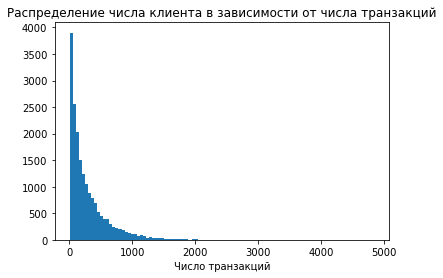

In [12]:
df = train_transactions[["app_id", "amnt"]].groupby("app_id").count().reset_index()
plt.hist(df["amnt"], bins=100)
plt.title("Распределение числа клиента в зависимости от числа транзакций")
plt.xlabel("Число транзакций")
plt.show()

In [13]:
print("Примерные значения среднего числа транзакций и медианного числа транзакций:")
df["amnt"].mean(), df["amnt"].median()

Примерные значения среднего числа транзакций и медианного числа транзакций:


(289.4873441429871, 178.0)

#### Количественные признаки
- *__amnt__* - Нормированная сумма транзакции. 0.0 - соответствует пропускам 

In [14]:
print("Примерная доля пропусков фичи amnt в датасете:")
(train_transactions["amnt"] == 0).sum() / len(train_transactions)

Примерная доля пропусков фичи amnt в датасете:


0.009054559906833159

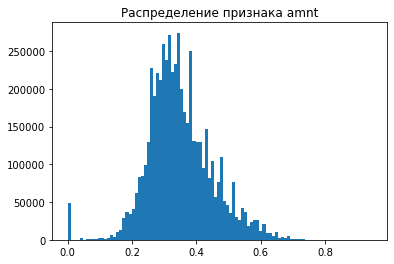

In [15]:
plt.hist(train_transactions["amnt"], bins=100)
plt.title("Распределение признака amnt")
plt.show()

- *__days_before__* - Количество дней до даты выдачи кредита

In [16]:
print("Минимальное и максимальное число дней до даты выдачи кредита:")
train_transactions["days_before"].min(), train_transactions["days_before"].max()

Минимальное и максимальное число дней до даты выдачи кредита:


(1, 359)

История по транзакциям для некоторых клиентов доходит до 1 года

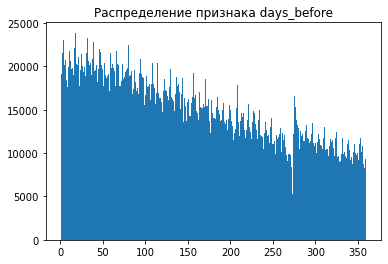

In [17]:
plt.hist(train_transactions["days_before"], bins=359)
plt.title("Распределение признака days_before")
plt.show()

- *__hour_diff__* - Количество часов с момента прошлой транзакции для данного клиента

In [18]:
print("Минимальное и максимальное количество часов с момента прошлой транзакции:")
train_transactions["hour_diff"].min(), train_transactions["hour_diff"].max()

Минимальное и максимальное количество часов с момента прошлой транзакции:


(-1, 7413)

Легко видеть, что в датасете первая транзакция клиента идет с hour_diff = -1

In [19]:
len(set(train_transactions["app_id"])) == (train_transactions["hour_diff"] == -1).sum()

True

In [20]:
print("Медианное и среднее количество часов с момента прошлой транзакции:")
train_transactions["hour_diff"].median(), train_transactions["hour_diff"].mean()

Медианное и среднее количество часов с момента прошлой транзакции:


(4.0, 24.5339990572403)

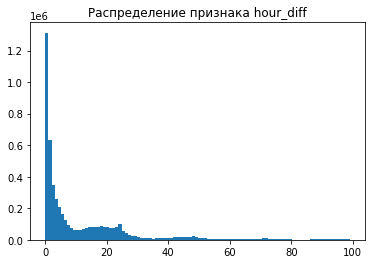

In [21]:
plt.hist(train_transactions["hour_diff"], bins=100, range=[0, 99])
plt.title("Распределение признака hour_diff")
plt.show()

Очень интересное распределение: во-первых, видно, что часто совершаются последовательные транзакции в один день спустя несколько часов (кейс "день шопинга"); во-вторых, отчетливо прослеживается дневная сезонность.

#### Категориальные признаки

- *app_id* - Идентификатор заявки. заявки пронумерованы так, что более поздним заявкам соответствует более поздняя дата
- *amnt* - Нормированная сумма транзакции. 0.0 - соответствует пропускам 
- *currency* - Идентификатор валюты транзакции
- *operation_kind* - Идентификатор типа транзакции
- *card_type* - Уникальный идентификатор типа карты
- *operation_type* - Идентификатор типа операции по пластиковой карте
- *operation_type_group* - Идентификатор группы карточных операций, например, дебетовая карта или кредитная карта
- *ecommerce_flag* - Признак электронной коммерции
- *payment_system* - Идентификатор типа платежной системы
- *income_flag* - Признак списания/внесения денежных средств на карту
- *mcc* - Уникальный идентификатор типа торговой точки
- *country* - Идентификатор страны транзакции
- *city* - Идентификатор города транзакции
- *mcc_category* - Идентификатор категории магазина транзакции
- *day_of_week* - День недели, когда транзакция была совершена
- *hour* - Час, когда транзакция была совершена
- *days_before* - Количество дней до даты выдачи кредита
- *weekofyear* - Номер недели в году, когда транзакция была совершена
- *hour_diff* - Количество часов с момента прошлой транзакции для данного клиента
- *transaction_number* - Порядковый номер транзакции клиента

Признак currency:
Число уникальных значений признака: 11
Самые популярные категории:
   currency    count     ratio
0         1  5294761  0.978762
1         2    49739  0.009194
2         3    26230  0.004849
3         4     5324  0.000984
4         5     4400  0.000813


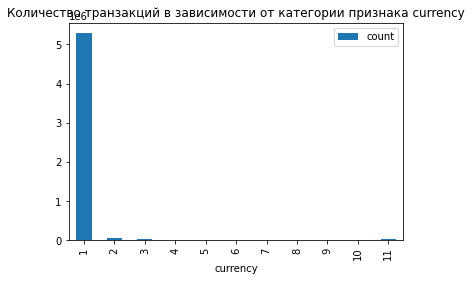



Признак operation_kind:
Число уникальных значений признака: 7
Самые популярные категории:
   operation_kind    count     ratio
0               1  4377697  0.809238
1               2   434493  0.080318
2               3   349294  0.064569
3               4   205815  0.038046
4               5    19968  0.003691


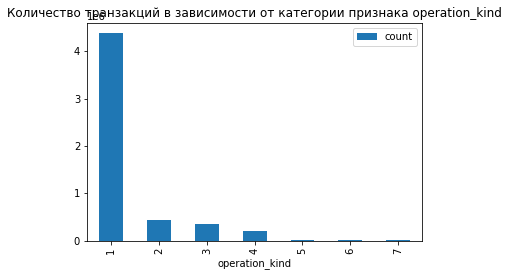



Признак card_type:
Число уникальных значений признака: 169
Самые популярные категории:
   card_type   count     ratio
0          1  545936  0.100919
1          2  493905  0.091301
2          3  367022  0.067846
3          4  267064  0.049368
4          5  192732  0.035627


Признак operation_type:
Число уникальных значений признака: 22
Самые популярные категории:
   operation_type    count     ratio
0               1  2587768  0.478361
1               2  1701888  0.314602
2               3   308019  0.056939
3               4   193367  0.035745
4               5   145881  0.026967


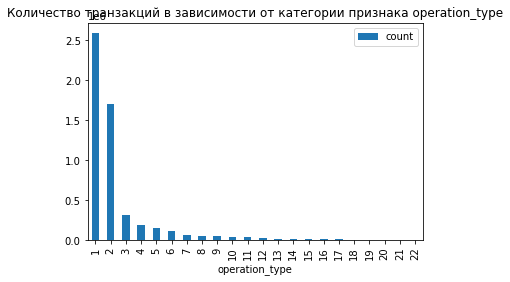



Признак operation_type_group:
Число уникальных значений признака: 3
Самые популярные категории:
   operation_type_group    count     ratio
0                     1  5035282  0.930796
1                     2   369283  0.068264
2                     3     5085  0.000940


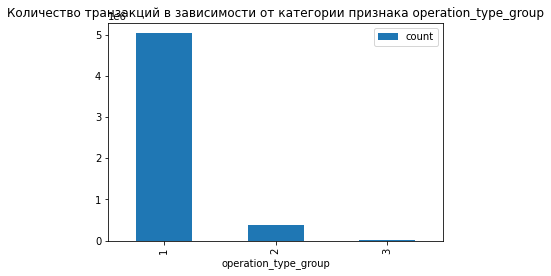



Признак ecommerce_flag:
Число уникальных значений признака: 2
Самые популярные категории:
   ecommerce_flag    count     ratio
0               1  4785109  0.884551
1               2   624541  0.115449


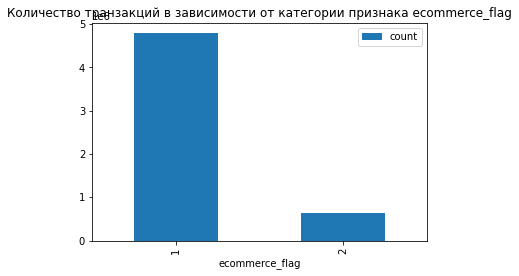



Признак payment_system:
Число уникальных значений признака: 6
Самые популярные категории:
   payment_system    count     ratio
0               1  2293857  0.424031
1               2  1490671  0.275558
2               3  1080222  0.199684
3               4   507282  0.093774
4               5    28911  0.005344


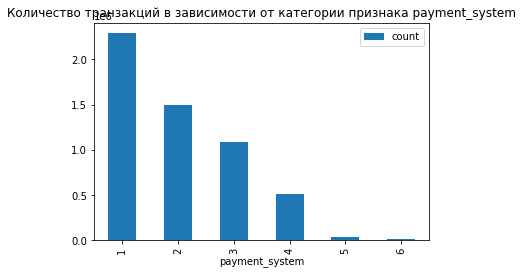



Признак income_flag:
Число уникальных значений признака: 3
Самые популярные категории:
   income_flag    count         ratio
0            1  4997629  9.238359e-01
1            2   412018  7.616352e-02
2            3        3  5.545645e-07


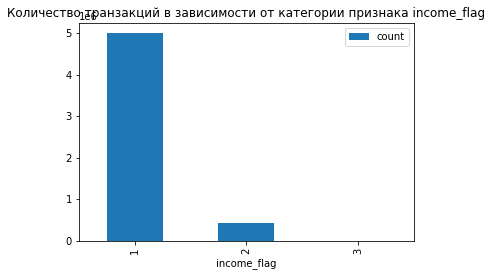



Признак mcc:
Число уникальных значений признака: 108
Самые популярные категории:
   mcc    count     ratio
0    1  1339946  0.247696
1    2   641987  0.118674
2    3   471234  0.087110
3    4   372362  0.068833
4    5   205756  0.038035


Признак country:
Число уникальных значений признака: 24
Самые популярные категории:
   country    count     ratio
0        1  5176761  0.956949
1        2    39586  0.007318
2        3    37839  0.006995
3        4    28147  0.005203
4        5    17312  0.003200


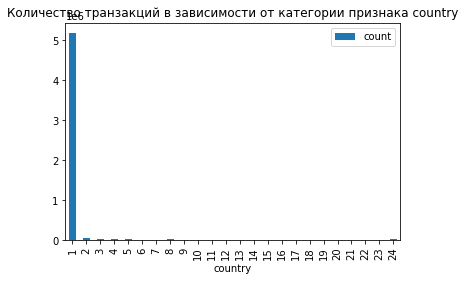



Признак city:
Число уникальных значений признака: 163
Самые популярные категории:
   city    count     ratio
0     1  1612330  0.298047
1     2   741120  0.137000
2     3   313948  0.058035
3     4   184971  0.034193
4     5   163268  0.030181


Признак mcc_category:
Число уникальных значений признака: 28
Самые популярные категории:
   mcc_category    count     ratio
0             1  1575799  0.291294
1             2   820989  0.151764
2             3   701179  0.129616
3             4   676990  0.125145
4             5   288742  0.053375


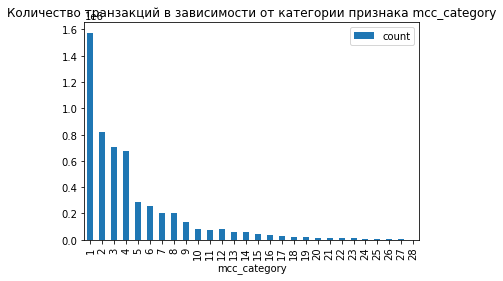



Признак day_of_week:
Число уникальных значений признака: 7
Самые популярные категории:
   day_of_week   count     ratio
0            1  859578  0.158897
1            2  804180  0.148657
2            3  782548  0.144658
3            4  769316  0.142212
4            5  751375  0.138895


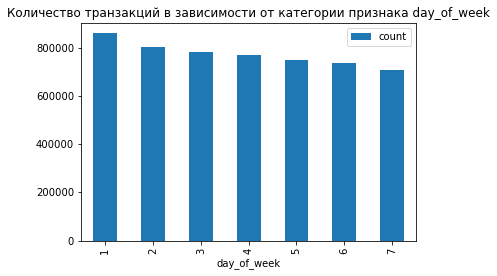



Признак hour:
Число уникальных значений признака: 24
Самые популярные категории:
   hour  count     ratio
0     0  96340  0.017809
1     1  34582  0.006393
2     2  27119  0.005013
3     3  28499  0.005268
4     4  40477  0.007482


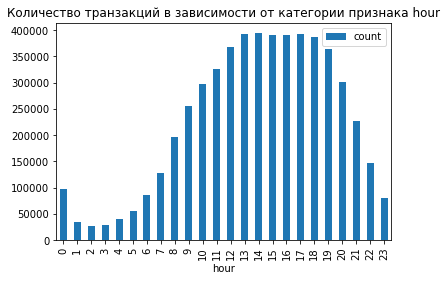



Признак weekofyear:
Число уникальных значений признака: 52
Самые популярные категории:
   weekofyear   count     ratio
0           1   99727  0.018435
1           2  115464  0.021344
2           3  132538  0.024500
3           4  120388  0.022254
4           5  134389  0.024842




In [22]:
for cat_feature in categorical_features:
    print(f"Признак {cat_feature}:")
    
    df = train_transactions[["app_id", cat_feature]].groupby(cat_feature).agg("count").reset_index()
    df.columns = [cat_feature, "count"]
    print(f"Число уникальных значений признака: {len(df)}")
    
    df["ratio"] = df["count"] / len(train_transactions)
    print("Самые популярные категории:")
    print(df.head())

    if len(df) < 50:
        df[[cat_feature, "count"]].plot.bar(cat_feature)
        plt.title(f"Количество транзакций в зависимости от категории признака {cat_feature}")
        plt.show()
        
    print("\n")

#### Некоторые замечания:
1. Все категориальные признаки закодировали натуральными числами. Часто (там, где нет явного порядка, как в случае с hour) категория, закодированная 1 -- самая популярная, далее идут категории по спаду популярности.
2. Из первого пункта следует, что, вероятно, для признака currency:

    - категория 1 кодирует рублевые операции
    - категории 2 и 3 - доллар и евро
    - категории с 4 по 10 - другие популярные валюты
    - категория 11 - остальные валюты
3. Аналогично предыдущему, можно предположить, что для признака city:
    - категория 1 кодирует Москву
    - категория 2 - Питер
    - и т.д.
4. Есть подозрение, что day_of_week закодировано не последовательно, а тоже по популярности дней недели для транзакций. Если посмотреть внимательнее, то можно выявить следующий циклический порядок дней недели: [7, 6, 5, 4, 3, 1, 2, 7, ...], т.е. порядок 2 и 1 изменен.
5. Очень интересное распределение признака hour.